Data Wrangling

# steps:
1. Gathering Data (kia)
2. Tools to clean data ( kis se clean) Libraries
3. How to do, kaisay(steps)

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [12]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.530377,1,0,-0.502445,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.571831,1,0,0.786845,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.254825,0,0,-0.488854,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.365167,1,0,0.420730,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.365167,0,0,-0.486337,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
df.isnull().sum() / len(df) *100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

Dealing with missing valuesl

In [15]:
df.drop(columns='deck', inplace=True)


In [16]:
df['age']= df.age.fillna(value =df['age'].mean())


In [17]:
df['embarked']= df.embarked.fillna(value =df['embarked'].mode()[0])

In [18]:
df['embark_town']= df.embark_town.fillna(value =df['embark_town'].mode()[0])

In [19]:
df.isnull().sum() / len(df) *100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

Outliers Removal


# visualization wala method:


c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='age'>

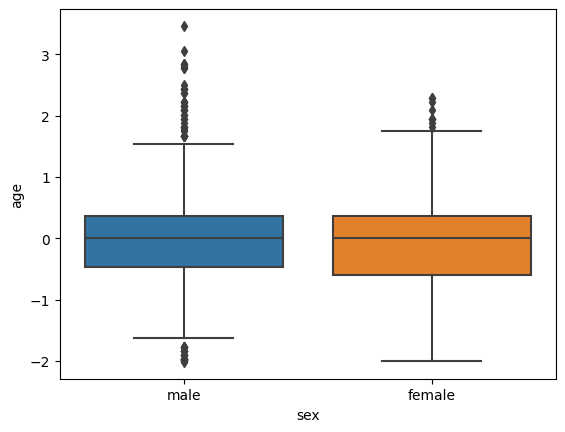

In [20]:
import seaborn as sns
sns.boxplot(data=df, y= 'age', x = 'sex')

#IQR method


In [21]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]

In [22]:
df.shape

(825, 14)

c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

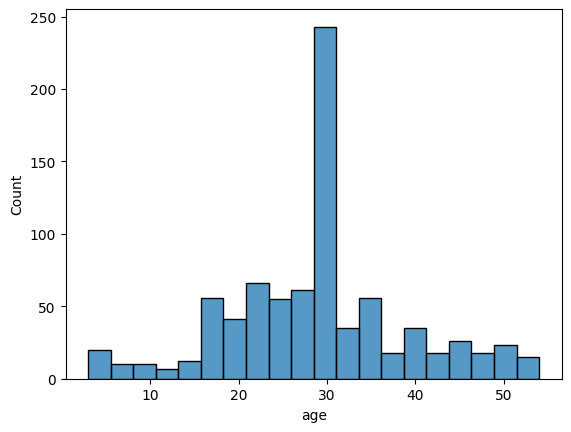

In [78]:
sns.histplot(df['age'])

In [23]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]

In [24]:
df.shape

(718, 14)

c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare', ylabel='Count'>

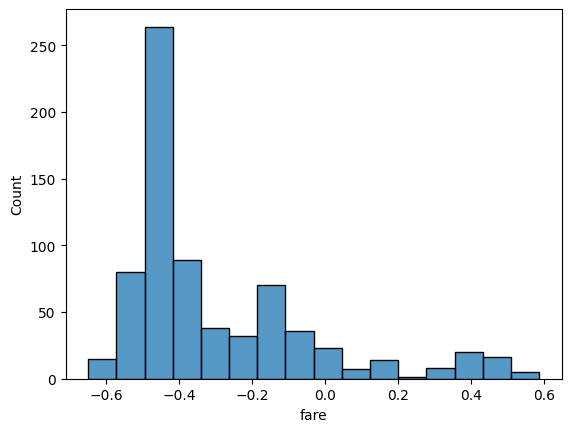

In [25]:
sns.histplot(df['fare'])

In [ ]:
Age = int(input("Enter your Age:"))

years_left = 60-Age
days_left = years_left * 365
moths_left = years_left * 12
weeks_left = years_left * 52

print(f"You have {days_left} days,{weeks_left} weeks and {moths_left} months left.")


years_lived = int(input("Enter your Age:"))
days_lived = years_lived * 365
months_lived= years_lived * 12
weeks_lived = years_lived * 52

print(f"You have {days_lived} days,{ weeks_lived} weeks and {months_lived} months lived.")


# Finding and dropping duplicates

In [26]:
df.shape

(718, 14)

In [85]:
# Finding duplication
df.duplicated().sum()

103

In [27]:
df_dcuplicates = df[df.duplicated()]
df_dcuplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,-1.492737e-17,0,0,-0.492378,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,-1.492737e-17,0,0,-0.489442,S,Third,man,True,Southampton,no,True
77,0,3,male,-1.492737e-17,0,0,-0.486337,S,Third,man,True,Southampton,no,True
87,0,3,male,-1.492737e-17,0,0,-0.486337,S,Third,man,True,Southampton,no,True
95,0,3,male,-1.492737e-17,0,0,-0.486337,S,Third,man,True,Southampton,no,True


In [90]:
df_dcuplicates.shape

(103, 14)

In [28]:
#Dropping
df.drop_duplicates(inplace=True)


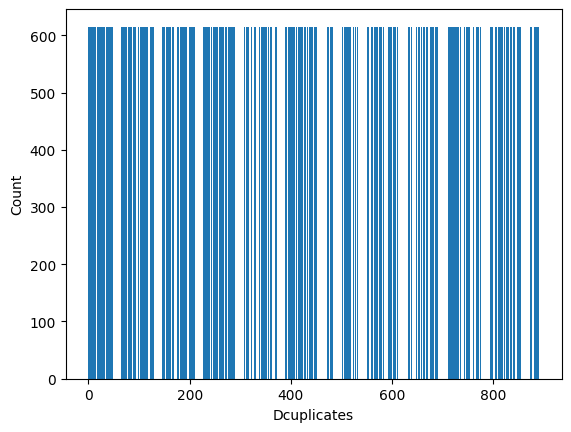

In [99]:
df_dcuplicates =df.duplicated()
df_dcuplicates_count = df_dcuplicates.value_counts()

plt.bar(df_dcuplicates.index,df_dcuplicates_count.values)
plt.xlabel("Dcuplicates")
plt.ylabel('Count')
plt.show()

In [29]:
df.shape

(615, 14)

# Data Normalization
To bring data at one Scale

# 1. import libraries

In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2.Data

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 3.Select columns to Normalize

In [6]:
cols_to_normalize = ['age','fare']

# 4. Create the scaler Function/tool

In [7]:
scaler = MinMaxScaler()

# 5. Fit and transform the data on scaler or vice versa

In [8]:
df[cols_to_normalize] =scaler.fit_transform(df[cols_to_normalize])

# 6. check the data

In [9]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,0.271174,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.472229,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,0.321438,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.434531,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.434531,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0.334004,0,0,0.025374,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,0.233476,0,0,0.058556,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,0.045771,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,0.321438,0,0,0.058556,C,First,man,True,C,Cherbourg,yes,True


In [10]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.367921,0.523008,0.381594,0.062858
std,0.486592,0.836071,0.182540,1.102743,0.806057,0.096995
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.247612,0.000000,0.000000,0.015440
50%,0.000000,3.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,3.000000,0.472229,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,8.000000,6.000000,1.000000


# IF same work StandardScaler ma krna ho to

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df 
cols_to_normalize = ['age','fare']
scaler = StandardScaler()
df[cols_to_normalize] =scaler.fit_transform(df[cols_to_normalize])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,-0.530377,1,0,-0.502445,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,0.571831,1,0,0.786845,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,-0.254825,0,0,-0.488854,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,0.365167,1,0,0.420730,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,0.365167,0,0,-0.486337,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.185937,0,0,-0.386671,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,-0.737041,0,0,-0.044381,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,-0.176263,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,-0.254825,0,0,-0.044381,C,First,man,True,C,Cherbourg,yes,True


x_stand = (x-mean(x))/std(x)

Where:

x_stand is the standardized varibale x is the original variable mean(x) is the mean fo the variable x std(x) is the standard deviation of variable x

# Log Transformation

In [38]:
kashti = sns.load_dataset('titanic')
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [39]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [40]:
import numpy as np

kashti['age'] = kashti['age'].fillna(kashti['age'].median())
kashti['fare'] = kashti['fare'].fillna(kashti['fare'].median())

# Log Transform

In [41]:

kashti['age']= np.log(kashti["age"])
kashti['fare']= np.log(kashti["fare"])

c:\python\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


log layna say values small skail ma aj jati hai

Agar 0 k near vaule come hai to ya method uses kra ga

In [42]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,3.091042,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3.637586,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,3.258097,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3.555348,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3.555348,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


Agar values 0 k near zadia hai to #log1p uses krna ga 

c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sex', ylabel='fare'>

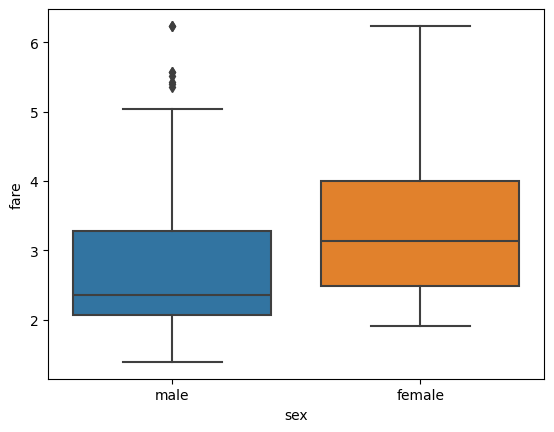

In [44]:
sns.boxplot(data=kashti, x='sex', y='fare')

c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

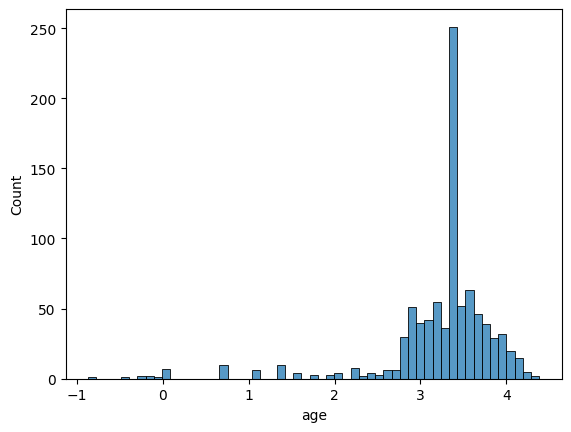

In [45]:
sns.histplot(kashti['age'])

In [48]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

# Organizing the Data

In [53]:
df["family_size"] = df['sibsp'] + df['parch']

c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='family_size', ylabel='Count'>

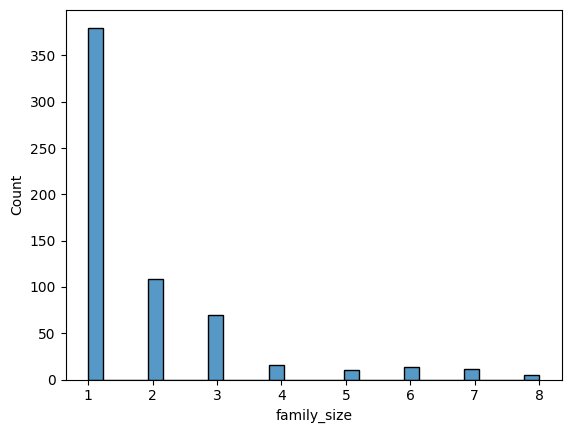

In [52]:
sns.histplot(df['family_size'])

c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\

<Axes: xlabel='sex', ylabel='age'>

c:\python\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\python\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


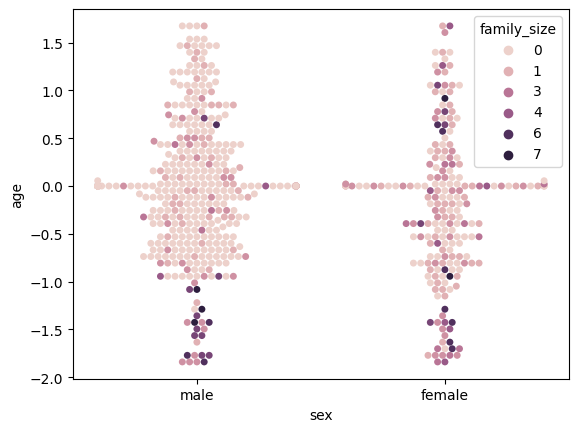

In [54]:
sns.swarmplot(data= df, x= "sex",y = "age", hue="family_size")

# Columns ka name ko change krna

In [55]:
df = df.rename(columns={'survived': 'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

Pivot_table

In [64]:
table = pd.pivot_table(df, values='fare',index='who',
    columns='survival', aggfunc=np.mean)
table

C:\Users\Rao Hammad Raza\AppData\Local\Temp\ipykernel_4860\151175101.py:1: FutureWarning: The provided callable <function mean at 0x000001D8E97D8360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table = pd.pivot_table(df, values='fare',index='who',


survival,0,1
who,,
child,-0.075080,-0.225657
man,-0.344554,-0.204568
woman,-0.317189,-0.192444


pivot_Table show the total Fare-->^

chacing Realiation Data

c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='fare', ylabel='age'>

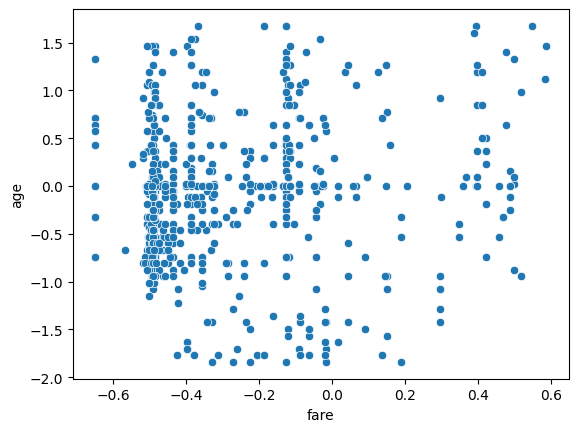

In [65]:
sns.scatterplot(data=df, x='fare',y='age')

In [66]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-5.303766e-01,1,0,-0.502445,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-2.548247e-01,0,0,-0.488854,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,3.651671e-01,1,0,0.420730,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,3.651671e-01,0,0,-0.486337,S,Third,man,True,Southampton,no,True,0
5,0,3,male,-1.492737e-17,0,0,-0.478116,Q,Third,man,True,Queenstown,no,True,0


# Saving the Wrangled Data

In [67]:
df.to_csv("Preprocessed_data.csv")

This is linePlot

c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='family_size', ylabel='age'>

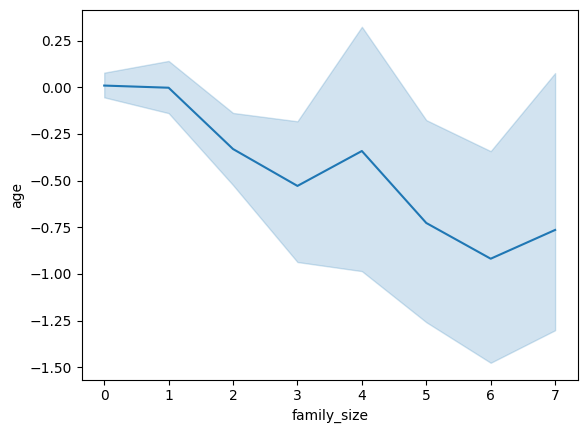

In [69]:
sns.lineplot(data=df, x="family_size", y="age")